# What this file does

I compare data by race from the RI Dept of Health and census data on the demographics of Rhode Island. The goal is to see if the demographic breakdown of cases, hospitalizations and fatalities is representative of the population of the state.

Data sources:

RI DoH Data
https://ri-department-of-health-covid-19-data-rihealth.hub.arcgis.com/

American Community Survey 2018 5 year estimate
https://data.census.gov/cedsci/table?q=Rhode%20Island%20population&g=0400000US44&hidePreview=true&tid=ACSDP5Y2018.DP05&vintage=2018&layer=VT_2018_040_00_PY_D1&cid=DP05_0001E

Reporting notes: You'll need to clarify what Non-Hispanic Other means.
You'll also want confirmation that all the percentages don't include unkown data, and confirm tha methodology below to adjust for that.

Editorial notes: Here's one way to deal with the considerable abouts of missing data.

# File Index

- Wrangling DoH data
- Wrangling population
- Understanding Census categories
- Pulling the American Community Survey values we want
- Adding population to our COVID data 
- How do you present these findings?
- Adjusting data for missing values 
- Preparing data for visualization 
- The stacked bar chart 
- The bullet chart

# Wrangling DoH data

Major caveat with these percentages is on the RI DoH website: "Percentages do not include cases with unknown or declined demographics or those that are pending further information." You basically can't convert these two raw numbers by multiplying into the total no of cases, hospitalities and fatalities. You also can't really write about this until you know just how many people they collected data from — you need to give readers an accurate idea of what the sample space is. Do they know the race of most of the people they're seeing? Half of them? It is important context for any analysis you do.

If you want to automate pulling in this data, ask the graphics and interactives team to set up the Selenium scraping script  we discussed for you.

In [2]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [3]:
#read file in 

In [4]:
df_covid = pd.read_csv('DoH_by_race.csv')

In [5]:
#these percentages seem to add up to 100 or near it — I would confirm that this is because of a rounding error, and that these four racial categories are disjoint and should add up to 100. 

In [6]:
df_covid

,Race,metric,percent,date
0,Hispanic/Latinx (any race),cases,43,04-28
1,Non-Hispanic black/African American,cases,13,04-28
2,Non-Hispanic white,cases,39,04-28
3,Non-Hispanic other,cases,4,04-28
4,Hispanic/Latinx (any race),hospitalizations,33,04-28
5,Non-Hispanic black/African American,hospitalizations,13,04-28
6,Non-Hispanic white,hospitalizations,50,04-28
7,Non-Hispanic other,hospitalizations,4,04-28
8,Hispanic/Latinx (any race),fatalities,12,04-28
9,Non-Hispanic black/African American,fatalities,7,04-28


In [7]:
#a pie chart might work better here, except I'd like confirmation that 1) these are disjoint categories and should add up to 100 and 2) I'm worried that Non-Hispanic other will disappear bc it's so small

Text(0, 1, '04-28')

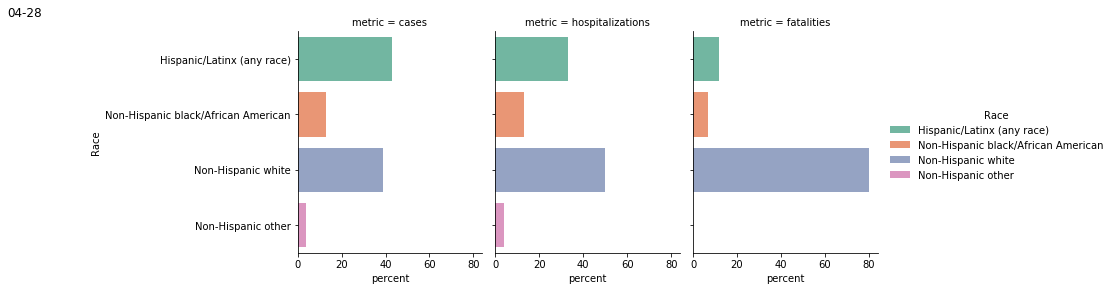

In [8]:
g = sns.catplot(y="Race", x="percent",
                hue="Race", col="metric",orient="h",
                data=df_covid, kind="bar",
                height=4, dodge = False, palette=sns.color_palette("Set2", n_colors=4))
g.fig.suptitle(df_covid['date'].any(), x=0, y=1)

# Wrangling population

The American Community Survey is conducted every year by the Census Bureau. Unlike the census, it doesn't try to count everyone, but uses sampling. That's why you typically never look at the ACS in just one year; the error margins are too large. Instead, you use estimates over a three or five year period. Here, I used 2014-2018. 

For more into on this: https://www.census.gov/programs-surveys/acs/guidance/estimates.html

In [9]:
#file with fields

In [10]:
df_population_metadata = pd.read_csv('ACSDP5Y2018.DP05_metadata_2020-04-27T161549.csv')

In [11]:
#fields that mention Hispanic

In [12]:
df_population_metadata[df_population_metadata['id'].str.contains('Hispanic')==True]

,GEO_ID,id,Unnamed: 2
281,DP05_0071E,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,NaN
282,DP05_0071M,Margin of Error!!HISPANIC OR LATINO AND RACE!!...,NaN
283,DP05_0071PE,Percent Estimate!!HISPANIC OR LATINO AND RACE!...,NaN
284,DP05_0071PM,Percent Margin of Error!!HISPANIC OR LATINO AN...,NaN
285,DP05_0072E,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,NaN
286,DP05_0072M,Margin of Error!!HISPANIC OR LATINO AND RACE!!...,NaN
287,DP05_0072PE,Percent Estimate!!HISPANIC OR LATINO AND RACE!...,NaN
288,DP05_0072PM,Percent Margin of Error!!HISPANIC OR LATINO AN...,NaN
289,DP05_0073E,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,NaN
290,DP05_0073M,Margin of Error!!HISPANIC OR LATINO AND RACE!!...,NaN


In [13]:
#read in ACS 2018 5 year estimate

In [14]:
df_population = pd.read_csv('ACSDP5Y2018.DP05_data_with_overlays_2020-04-27T161549.csv')

# Understanding Census categories


You don't want to look for "RACE"'; you want to look for "HISPANIC OR LATINO AND RACE". This is broken down into 

- Hispanic or Latino (of any race)
- Not Hispanic or Latino 

The sum of the percentages in each case add up to 100. In this case, its 15 percent and 85 percent respectively.


In [15]:
#"DP05_0071PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)",
df_population['DP05_0071PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                 15.0
Name: DP05_0071PE, dtype: object

In [16]:
percent_hispanic = float(df_population['DP05_0071PE'][1])

In [17]:
#"DP05_0076PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino",

df_population['DP05_0076PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                 85.0
Name: DP05_0076PE, dtype: object

In [18]:
percent_non_hispanic = float(df_population['DP05_0076PE'][1])

Hispanic or Latino is further subdivided, as is Not Hispanic or Latino. We care about the second here when we're trying to match up categories to the RI DoH data; they report the data the way they do based on census categories. 

Not Hispanic or Latino:
- White alone
- Black or African American alone
- American Indian or Alaska Native alone 
- Asian alone
- Native Hawaiian and Other Pacific Islander alone
- Some other race alone 
- Two or more races
    
These categories are disjoint sets, so there's no overlap between them. If you add up all the people in each category, you'll get the total number of Non-Hispanic or Latino people in the state. 

Percent in this column is always these values as a percent of the total population; therefore, if you sum up the percentages in these subcategories, they should add up to 85 percent, the percentage of Non-Hispanic or Latino people we found above.



In [19]:
#Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone
df_population['DP05_0077PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                 72.7
Name: DP05_0077PE, dtype: object

In [20]:
percent_non_hispanic_white = float(df_population['DP05_0077PE'][1])

In [21]:
#"DP05_0078PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone",
df_population['DP05_0078PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                  5.6
Name: DP05_0078PE, dtype: object

In [22]:
percent_non_hispanic_black = float(df_population['DP05_0078PE'][1])

Non-Hispanic other: If you confirm that the four racial categories that the DoH is reporting add up to 100 percent, this is what you'd do. What that basically means is that this category includes Asians, Native Hawaiians, American Indians, Some other race alone — probably because on their own these percentages would be tiny. But the census doesn't report this — so how do you figure it out? 

The question is whether or not two or more cases are under Non Hispanic Other or not. First case, it is:

In [23]:
#percentage of Non-Hispanic Latino folks - sum of percent of Non-Hispanic whites and Non-Hispanic black people
percent_non_hispanic - (percent_non_hispanic_white + percent_non_hispanic_black)

6.700000000000003

In [24]:
percent_non_hispanic_other = percent_non_hispanic - (percent_non_hispanic_white + percent_non_hispanic_black)

In case two or more races are counted separately from Non Hispanic Other

In [25]:
df_population['DP05_0083PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                  2.3
Name: DP05_0083PE, dtype: object

In [26]:
#"DP05_0083PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races",
percent_non_hispanic_two_or_more_races = float(df_population['DP05_0083PE'][1])

# Pulling out the American Community Survey values we want

**Note** Edited April 29, 7:30pm to account for the fact that RI counts non_hispanic_two_races separately from non_hispanic_other.

In [27]:
#save the value of non hispanic other separate from two or more races

In [28]:
percent_non_hispanic_other_without_two_or_more_races = percent_non_hispanic_other - percent_non_hispanic_two_or_more_races

In [29]:
#Add up to 100! 

In [30]:
percent_non_hispanic_two_or_more_races + percent_non_hispanic_other_without_two_or_more_races + percent_non_hispanic_white + percent_non_hispanic_black + percent_hispanic

100.0

In [31]:
#if two or more races

In [32]:
#making this machine readable and nice

In [33]:
dict_values = {}
dict_values['ACS_hispanic'] = percent_hispanic
dict_values['ACS_non_hispanic_black'] = percent_non_hispanic_black
dict_values['ACS_non_hispanic_white'] = percent_non_hispanic_white
dict_values['ACS_non_hispanic_other_without_two_or_more_races'] = percent_non_hispanic_other_without_two_or_more_races
dict_values['ACS_non_hispanic_two_or_more_races'] = percent_non_hispanic_two_or_more_races
dict_values['ACS_non_hispanic_other_with_two_or_more_races'] = percent_non_hispanic_other

dict_values
with open('ACS_values.csv', 'w') as f:
    for key in dict_values.keys():
        f.write("%s,%s\n"%(key,dict_values[key]))

In [34]:
df_ACS = pd.read_csv('ACS_values.csv')

In [35]:
df_ACS

,race,percentage_total_population
0,ACS_hispanic,15.0
1,ACS_non_hispanic_black,5.6
2,ACS_non_hispanic_white,72.7
3,ACS_non_hispanic_other_without_two_or_more_races,4.4
4,ACS_non_hispanic_two_or_more_races,2.3
5,ACS_non_hispanic_other_with_two_or_more_races,6.7


In [36]:
#population graph; you'll have to find out whether to include two races in other or not. I suspect not based on the pptx

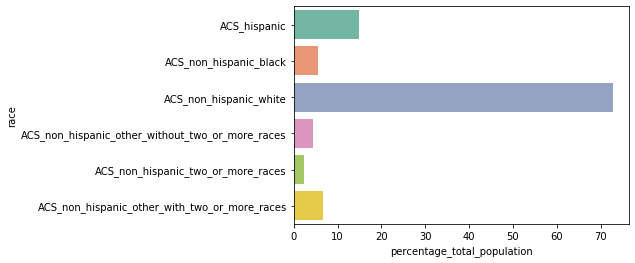

In [37]:
g = sns.barplot(x='percentage_total_population',y='race', orient='h', data=df_ACS, palette=sns.color_palette("Set2", n_colors=6))


# Adding population to our COVID data

Combining these population data with our COVID data; this assumes that Non Hispanic Other doesn't include Non Hispanic Two or More Races (it uses the pink bar above)

In [46]:
df_covid

,Race,metric,percent,date
0,Hispanic/Latinx (any race),cases,43,04-28
1,Non-Hispanic black/African American,cases,13,04-28
2,Non-Hispanic white,cases,39,04-28
3,Non-Hispanic other,cases,4,04-28
4,Hispanic/Latinx (any race),hospitalizations,33,04-28
5,Non-Hispanic black/African American,hospitalizations,13,04-28
6,Non-Hispanic white,hospitalizations,50,04-28
7,Non-Hispanic other,hospitalizations,4,04-28
8,Hispanic/Latinx (any race),fatalities,12,04-28
9,Non-Hispanic black/African American,fatalities,7,04-28


In [40]:
df_covid_hispanic = df_covid[df_covid['Race']=='Hispanic/Latinx (any race)']

In [45]:
df_covid_hispanic['race_population'] = df_ACS[df_ACS['race']=='ACS_hispanic']['percentage_total_population'][0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_covid_black = df_covid[df_covid['Race']=='Non-Hispanic black/African American']

In [60]:
df_covid_black['race_population'] = df_ACS[df_ACS['race']=='ACS_non_hispanic_black']['percentage_total_population'][1]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_covid_white = df_covid[df_covid['Race']=='Non-Hispanic white']

In [67]:
df_covid_white['race_population'] = df_ACS[df_ACS['race']=='ACS_non_hispanic_white']['percentage_total_population'][2]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_covid_other = df_covid[df_covid['Race']=='Non-Hispanic other']

In [70]:
df_covid_other['race_population']= df_ACS[df_ACS['race']=='ACS_non_hispanic_other_without_two_or_more_races']['percentage_total_population'][3]
                                                                                                              

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_covid_with_pop = df_covid_hispanic.append(df_covid_black).append(df_covid_white).append(df_covid_other)

In [76]:
df_covid_with_pop

,Race,metric,percent,date,race_population
0,Hispanic/Latinx (any race),cases,43,04-28,15.0
4,Hispanic/Latinx (any race),hospitalizations,33,04-28,15.0
8,Hispanic/Latinx (any race),fatalities,12,04-28,15.0
1,Non-Hispanic black/African American,cases,13,04-28,5.6
5,Non-Hispanic black/African American,hospitalizations,13,04-28,5.6
9,Non-Hispanic black/African American,fatalities,7,04-28,5.6
2,Non-Hispanic white,cases,39,04-28,72.7
6,Non-Hispanic white,hospitalizations,50,04-28,72.7
10,Non-Hispanic white,fatalities,80,04-28,72.7
3,Non-Hispanic other,cases,4,04-28,4.4


# How do you present these findings? 

I wouldn't give people rates — these are estimates and I don't think rates per race are that meaningful. 

I would just state the percentage of people who have tested positive, fatalities and hospitalizations and then juxtapose with population demographics, as seen here: https://www.propublica.org/article/early-data-shows-african-americans-have-contracted-and-died-of-coronavirus-at-an-alarming-rate and https://www.nytimes.com/2020/04/07/us/coronavirus-race.html

**NOTE** Figure out what to do about the cases, hospitalizations and fatalities that the DoH doesn't have race data on! Ask if these percentages are for totals or for the people for whom they've recorded race. I suspect the latter! 

Possible opening line:

Hispanic people are overrepresented among those who have tested postive for coronavirus in the state and among those hospitalized as a result. However, they are not overrepresented in fatalities when compared with their composition of Rhode Island's population.
 

# Adjusting data for missing values 

How you deal with incomplete data. It seems that RI is reporting data on race only as a percentage of cases, hospitalizations and fatalities where race is known. (Please confirm this with the DoH!) What this would mean is that 43% of total cases weren't Hispanic; 43% of 60& of total cases were Hispanic. If you report this number, which is lower than 43%,  you can guarantee to your readers that the percentage of cases will never dip below the adjusted value; it can only increase. 

If you report the 43% number, if comes with a huge error interval since 40% of total cases are unknown. It's hard to communicate that uncertainty to a reader. But if you adjust, you still have a case of Hispanic overrepresentation and you can tell readers with certainty that the numbers will never dip below the value you're giving them.

**NOTE** You can talk about overrepresentation with confidence when you do this, not underrepresentation — as discussed, these numbers may increase but they won't decrease. If you do talk about underrepresentation, make sure that you mention that a bunch of the data is unkown in each case.

**Cases**

In [125]:
#filter

In [99]:
df_covid_cases = df_covid_with_pop[df_covid_with_pop['metric']=='cases']

In [100]:
#bc 41% cases are of unknown race as of 04-29

In [101]:
df_covid_cases['adjusted'] = (df_covid[df_covid['metric']=='cases']['percent'].astype(float))*0.59

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#this is called long data

In [102]:
df_covid_cases

,Race,metric,percent,date,race_population,adjusted
0,Hispanic/Latinx (any race),cases,43,04-28,15.0,25.37
1,Non-Hispanic black/African American,cases,13,04-28,5.6,7.67
2,Non-Hispanic white,cases,39,04-28,72.7,23.01
3,Non-Hispanic other,cases,4,04-28,4.4,2.36


In [103]:
df_covid_cases_pivoted = df_covid_cases.pivot(index='metric', columns='Race', values='adjusted')
df_covid_cases_pivoted['unknown'] = 41

In [ ]:
#this is called wide data

In [104]:
df_covid_cases_pivoted

Race,Hispanic/Latinx (any race),Non-Hispanic black/African American,Non-Hispanic other,Non-Hispanic white,unknown
metric,,,,,
cases,25.37,7.67,2.36,23.01,41


**Hospitalizations**

In [ ]:
#filter

In [105]:
df_covid_hosp = df_covid_with_pop[df_covid_with_pop['metric']=='hospitalizations']

In [106]:
#bc 31% hospitalizations are of unknown race as of 04-29

In [107]:
df_covid_hosp['adjusted']=(df_covid[df_covid['metric']=='hospitalizations']['percent'].astype(float))*0.69

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#long

In [108]:
df_covid_hosp

,Race,metric,percent,date,race_population,adjusted
4,Hispanic/Latinx (any race),hospitalizations,33,04-28,15.0,22.77
5,Non-Hispanic black/African American,hospitalizations,13,04-28,5.6,8.97
6,Non-Hispanic white,hospitalizations,50,04-28,72.7,34.50
7,Non-Hispanic other,hospitalizations,4,04-28,4.4,2.76


In [109]:
df_covid_hosp_pivoted = df_covid_hosp.pivot(index='metric', columns='Race', values='adjusted')
df_covid_hosp_pivoted['unknown'] = 31

In [ ]:
#wide

In [110]:
df_covid_hosp_pivoted

Race,Hispanic/Latinx (any race),Non-Hispanic black/African American,Non-Hispanic other,Non-Hispanic white,unknown
metric,,,,,
hospitalizations,22.77,8.97,2.76,34.5,31


**Fatalities**

In [111]:
#bc 10% fatalities are of unknown race as of 04-29

In [115]:
df_covid_fat = df_covid_with_pop[df_covid_with_pop['metric']=='fatalities']

In [116]:
df_covid_fat['adjusted'] = (df_covid_with_pop[df_covid_with_pop['metric']=='fatalities']['percent'].astype(float))*0.90

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#long

In [117]:
df_covid_fat

,Race,metric,percent,date,race_population,adjusted
8,Hispanic/Latinx (any race),fatalities,12,04-28,15.0,10.8
9,Non-Hispanic black/African American,fatalities,7,04-28,5.6,6.3
10,Non-Hispanic white,fatalities,80,04-28,72.7,72.0
11,Non-Hispanic other,fatalities,0,04-28,4.4,0.0


In [118]:
df_covid_fat_pivoted = df_covid_fat.pivot(index='metric', columns='Race', values='adjusted')
df_covid_fat_pivoted['unknown'] = 10

In [ ]:
#wide

In [119]:
df_covid_fat_pivoted

Race,Hispanic/Latinx (any race),Non-Hispanic black/African American,Non-Hispanic other,Non-Hispanic white,unknown
metric,,,,,
fatalities,10.8,6.3,0.0,72.0,10


# Preparing data for visualization 

We're preparing long and wide versions of the same data because we're going to put these values in datawrapper later for different charts.

In [ ]:
#long

In [128]:
df_covid_adjusted = df_covid_cases.append(df_covid_hosp).append(df_covid_fat)

In [129]:
df_covid_adjusted

,Race,metric,percent,date,race_population,adjusted
0,Hispanic/Latinx (any race),cases,43,04-28,15.0,25.37
1,Non-Hispanic black/African American,cases,13,04-28,5.6,7.67
2,Non-Hispanic white,cases,39,04-28,72.7,23.01
3,Non-Hispanic other,cases,4,04-28,4.4,2.36
4,Hispanic/Latinx (any race),hospitalizations,33,04-28,15.0,22.77
5,Non-Hispanic black/African American,hospitalizations,13,04-28,5.6,8.97
6,Non-Hispanic white,hospitalizations,50,04-28,72.7,34.50
7,Non-Hispanic other,hospitalizations,4,04-28,4.4,2.76
8,Hispanic/Latinx (any race),fatalities,12,04-28,15.0,10.80
9,Non-Hispanic black/African American,fatalities,7,04-28,5.6,6.30


In [130]:
#wide

In [131]:
df_covid_adjusted_pivoted = df_covid_cases_pivoted.append(df_covid_hosp_pivoted).append(df_covid_fat_pivoted)

In [132]:
df_covid_adjusted_pivoted.

Race,Hispanic/Latinx (any race),Non-Hispanic black/African American,Non-Hispanic other,Non-Hispanic white,unknown
metric,,,,,
cases,25.37,7.67,2.36,23.01,41
hospitalizations,22.77,8.97,2.76,34.50,31
fatalities,10.80,6.30,0.00,72.00,10


# How to visualize: the stacked bar chart

Try using datawrapper.de! Copy the data below into the datawrapper chart field.

For this, you would use df_covid_adjusted_pivoted and a pivoted version of the population table, below.

In [140]:
df_ACS['State']='Rhode Island'

In [144]:
df_ACS_pivoted = df_ACS.pivot(index='State', columns='race', values='percentage_total_population')

In [ ]:
#Note: You probably want to use non_hispanic_other_without_two_or_more_races and non_hispanic_two_or_more_races | don't use ACS_non_hispanic_other_with_two_or_more_races 

In [148]:
df_ACS_pivoted.drop(['ACS_non_hispanic_other_with_two_or_more_races'], axis=1)

race,ACS_hispanic,ACS_non_hispanic_black,ACS_non_hispanic_other_without_two_or_more_races,ACS_non_hispanic_two_or_more_races,ACS_non_hispanic_white
State,,,,,
Rhode Island,15.0,5.6,4.4,2.3,72.7


In [152]:
df_ACS_pivoted.drop(['ACS_non_hispanic_other_with_two_or_more_races'], axis=1).to_csv('df_ACS_pivoted.csv')

In [153]:
df_covid_adjusted_pivoted.to_csv('df_covid_adjusted_pivoted.csv')

Here's what the chart looks like!  https://datawrapper.dwcdn.net/MGlB4/

# How to visualize: the bullet chart

In [151]:
df_covid_adjusted.to_clipboard()

In [154]:
df_covid_adjusted.to_csv('df_covid_adjusted.csv')

The chart would look like this: https://datawrapper.dwcdn.net/FbqUr